In [194]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [195]:
data = pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [196]:
data.shape

(200, 5)

In [197]:
data.columns.values

array(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'], dtype=object)

In [198]:
data.info() # no hay valores faltantes ya que todas las columnas tienen 200 entradas correctamente

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [199]:
data.isnull().sum() # no hay valores nulos en las columnas

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [200]:
data = data.iloc[:,[3,4]] ## me quedo con todas las filas pero solo con las columnas 3 y 4
data.head()


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [201]:
## funcion del metodo del codo
def metodoDelCodo(dataset):
    Nc = range(1, 10)
    kmeans = [KMeans(n_clusters=i) for i in Nc]
    kmeans
    score = [kmeans[i].fit(dataset).score(dataset) for i in range(len(kmeans))]
    score
    plt.plot(Nc,score)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Score')
    plt.title('Elbow Curve')
    plt.show()

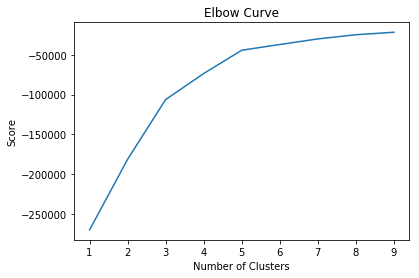

In [202]:
metodoDelCodo(data) ## ejecuto la funcion del metodo del codo.

In [203]:
## el metodp del codo me indica en este caso que lo conveniente es utilizar un K=5 para ejecutar el algoritmo de K-means

In [204]:
data_norm = (data-data.min()) / (data.max()-data.min())
data_norm

,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959
5,0.016393,0.765306
6,0.024590,0.051020
7,0.024590,0.948980
8,0.032787,0.020408
9,0.032787,0.724490


In [205]:
from sklearn.cluster import KMeans
from sklearn import datasets

In [206]:
modelo_kmeans = KMeans(n_clusters=5) ## indicar el numero de cluster que queremos obtener
modelo_kmeans.fit(data_norm) ## se obtiene el modelo con clustering K-means

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [207]:
modelo_kmeans.labels_ ##indica a que cluster pertenece cada cliente

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 4,
       2, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 1, 0, 4, 0, 1, 0, 1, 0,
       4, 0, 1, 0, 1, 0, 1, 0, 1, 0, 4, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0])

In [208]:
modelo_kmeans = pd.Series(modelo_kmeans.labels_)

In [209]:
data_norm["cluster_kmeans"] = modelo_kmeans ## agrego en el dataset la columna "cluster_kmeans" que indica el numero de cluster de cada cliente
data_norm.head()

,Annual Income (k$),Spending Score (1-100),cluster_kmeans
0,0.000000,0.387755,2
1,0.000000,0.816327,3
2,0.008197,0.051020,2
3,0.008197,0.775510,3
4,0.016393,0.397959,2


Text(0, 0.5, 'cantidad de clientes')

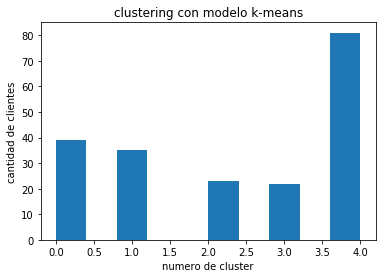

In [210]:
plt.hist(modelo_kmeans)
plt.title("clustering con modelo k-means")
plt.xlabel("numero de cluster")
plt.ylabel("cantidad de clientes")

In [211]:
data_norm.groupby("cluster_kmeans").mean()

,Annual Income (k$),Spending Score (1-100)
cluster_kmeans,,
0,0.586381,0.827839
1,0.600000,0.164431
2,0.092659,0.203194
3,0.087928,0.799629
4,0.330298,0.495087


In [212]:
## cantidad de personas por cluster
data_norm["cluster_kmeans"].value_counts() 

4    81
0    39
1    35
2    23
3    22
Name: cluster_kmeans, dtype: int64

In [213]:
## porcentaje de personas por cluster
clus1 = 81/len(data_norm)*100
clus2 = 39/len(data_norm)*100 
clus4 = 35/len(data_norm)*100 
clus3 = 23/len(data_norm)*100 
clus0 = 22/len(data_norm)*100 

print("el %s por ciento de las personas son del cluster 1" %clus1 )
print("el %s por ciento de las personas son del cluster 2" %clus2 )
print("el %s por ciento de las personas son del cluster 4" %clus4 )
print("el %s por ciento de las personas son del cluster 3" %clus3 )
print("el %s por ciento de las personas son del cluster 0" %clus0 )

el 40.5 por ciento de las personas son del cluster 1
el 19.5 por ciento de las personas son del cluster 2
el 17.5 por ciento de las personas son del cluster 4
el 11.5 por ciento de las personas son del cluster 3
el 11.0 por ciento de las personas son del cluster 0


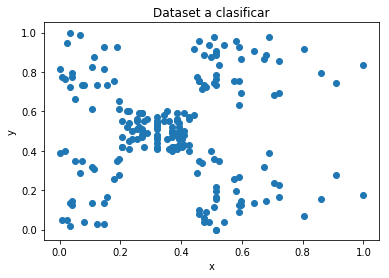

In [214]:
## grafico de los datos sin distinguir los grupos a traves de colores
plt.plot()
plt.title("Dataset a clasificar")
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(data_norm["Annual Income (k$)"], data_norm["Spending Score (1-100)"])
plt.show()

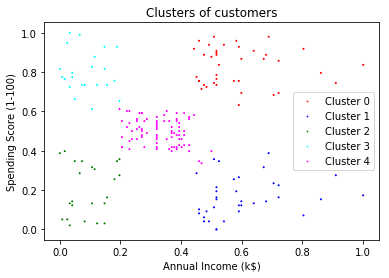

In [215]:
## grafico de los datos distinguiendo los grupos con colores

plt.scatter(data_norm["Annual Income (k$)"], data_norm["Spending Score (1-100)"], (data_norm["cluster_kmeans"] == 0) , c = 'red', label = 'Cluster 0')
plt.scatter(data_norm["Annual Income (k$)"], data_norm["Spending Score (1-100)"], (data_norm["cluster_kmeans"] == 1) , c = 'blue', label = 'Cluster 1')
plt.scatter(data_norm["Annual Income (k$)"], data_norm["Spending Score (1-100)"], (data_norm["cluster_kmeans"] == 2) , c = 'green', label = 'Cluster 2')
plt.scatter(data_norm["Annual Income (k$)"], data_norm["Spending Score (1-100)"], (data_norm["cluster_kmeans"] == 3) , c = 'cyan', label = 'Cluster 3')
plt.scatter(data_norm["Annual Income (k$)"], data_norm["Spending Score (1-100)"], (data_norm["cluster_kmeans"] == 4) , c = 'magenta', label = 'Cluster 4')



plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()